# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?APPID="+weather_api_key
response = requests.get(url +"&q=Miami").json()
print(response)

{'coord': {'lon': -80.1937, 'lat': 25.7743}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 303.65, 'feels_like': 309.71, 'temp_min': 300.15, 'temp_max': 305.93, 'pressure': 1014, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 139, 'gust': 4.92}, 'clouds': {'all': 75}, 'dt': 1627237058, 'sys': {'type': 2, 'id': 2009435, 'country': 'US', 'sunrise': 1627209819, 'sunset': 1627258238}, 'timezone': -14400, 'id': 4164138, 'name': 'Miami', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:

# set up lists to hold reponse info
cities = []
lat_lng = []
temp = []
humidity = []
wind  = []
clouds = []


# Loop through the list of cities and perform a request for data on each
for i in range(len(cities)):
    response = requests.get(url +"&q="+cities[i]).json()
    print(response)
    print(str(i+1) + "."+ cities[i])
    lat_lng.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

    humidity.append(response['main']['humidity'])
    wind.append(response['wind']['humidity'])
    clouds.append(response['main']['humidity'])
    
    
    
print(f"The latitude information received is: {lat_lng}")
print(f"The temperature information received is: {temp}")

The latitude information received is: []
The temperature information received is: []


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Export the city data into a .csv.

cities_df.to_csv("../output_data/cities.csv", index=False)

#Display the DataFrame

weather_dict ={
    "City": cities,
    "lat" : lat_lng,
    "temp": temp, 
    "humidity": humidity, 
    "wind": wind, 
    "clouds" :clouds
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

NameError: name 'cities_df' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

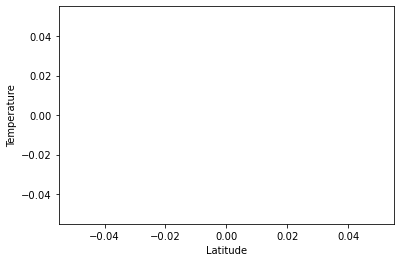

In [35]:
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

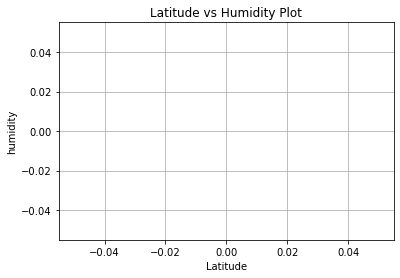

In [18]:
#Build a scatter plot for Latitude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity Plot")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitideandHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

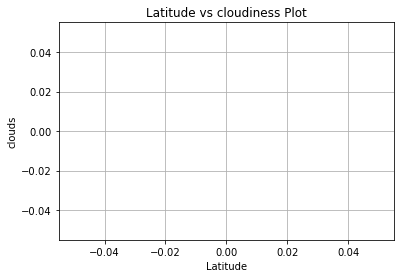

In [24]:
#Build a scatter plot for Latitude vs cloudiness plot
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs cloudiness Plot")
plt.ylabel("clouds")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitideandHumidity.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

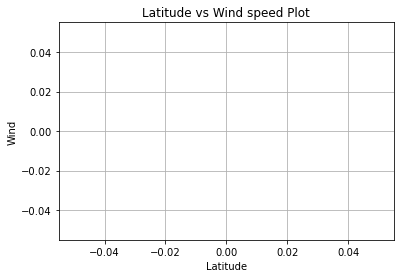

In [33]:
#Build a scatter plot for Latitude vs Wind speed plot
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind speed Plot")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitideandWind.png")

# Show plot
plt.show()

## Linear Regression

In [43]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

ValueError: Inputs must not be empty.

In [44]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

NameError: name 'slope' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression